### Exploratory Data Analysis¶
Distribution of Male and Female

Bar Chart

Pie Chart

What Distribution of size of all Images

Histogram

Box Plot

Split by “Gender”

Make the decision of width & height to resize using above chart.

Remove the few images that are having very less size

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#computer visison library
import cv2

#glob
from glob import glob

In [3]:
#extract path of male and female in crop_data folder and put them in a list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')


In [5]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis =0)

In [7]:
df.tail()

,filepath,gender
2170,./crop_data/male\male_994.jpg,male
2171,./crop_data/male\male_996.jpg,male
2172,./crop_data/male\male_997.jpg,male
2173,./crop_data/male\male_998.jpg,male
2174,./crop_data/male\male_999.jpg,male


In [6]:
df.head()


,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_100.jpg,female
3,./crop_data/female\female_1002.jpg,female
4,./crop_data/female\female_1005.jpg,female


In [9]:
df.shape

(4762, 2)

In [10]:
#it will take each image path 
#then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [11]:
df['dimension'] = df['filepath'].apply(get_size) 
#store dimensions of image in this columns

In [12]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,273
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


### Distribution of Male and Female

Bar Chart

Pie Chart


In [13]:
dist_gender = df['gender'].value_counts()
dist_gender

female    2587
male      2175
Name: gender, dtype: int64

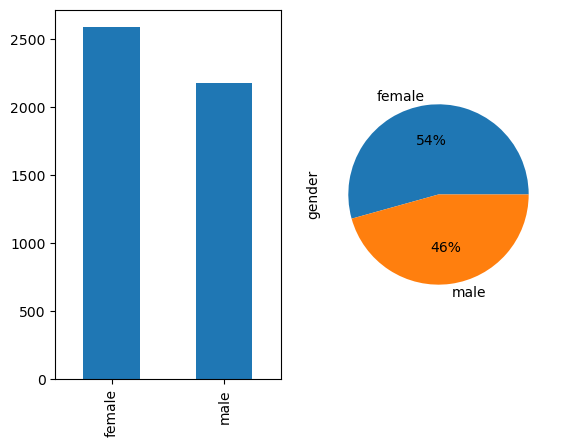

In [18]:
fig,ax= plt.subplots(nrows =1 , ncols = 2)
dist_gender.plot(kind='bar',ax = ax[0])
dist_gender.plot(kind='pie',ax =ax[1],autopct='%0.0f%%')
plt.show()


### What Distribution of size of all Images

Histogram

Box Plot

Split by “Gender”

In [19]:
df['dimension']

0       273
1       273
2       122
3       122
4       182
       ... 
2170    122
2171     54
2172    122
2173     81
2174    182
Name: dimension, Length: 4762, dtype: int64

<Axes: xlabel='dimension', ylabel='Count'>

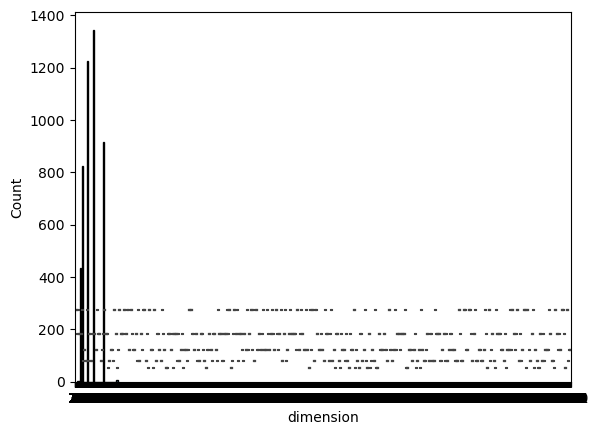

In [20]:
plt.figure(figsize=(12,60))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,1)
sns.boxplot(df['dimension'])